# Importing Libraries

In [1]:
# !pip install tensorflow
# !pip install opencv-python

In [2]:
import numpy as np
import tensorflow as tf, keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.13.1


Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

# Test set Image Processing

In [4]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [5]:
# !pip uninstall tensorflow

In [6]:
# !pip install tensorflow==2.11.0

# Loading Model

In [7]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.h5')

#Visualising and Performing Prediction on Single image

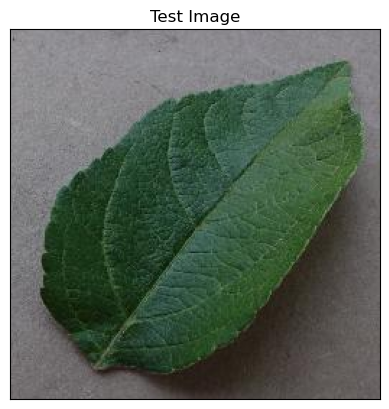

In [8]:
#Test Image Visualization
import cv2
image_path = 'test/test/healthyappleMy2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

## Testing Model

In [9]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 143ms/step


In [10]:
print(predictions)

[[2.3279485e-04 9.8076862e-06 7.2066017e-05 6.3414413e-01 2.9943520e-04
  1.2656281e-03 2.8698350e-05 5.3793221e-04 2.6809794e-05 6.0212609e-05
  4.0437345e-04 1.7961187e-04 1.3905297e-04 1.2823813e-04 1.0154780e-03
  2.2649497e-04 1.6020934e-04 2.0205816e-05 1.5328216e-04 6.6776723e-03
  8.6520921e-04 4.1925453e-02 1.5744944e-03 1.2786628e-03 2.2473744e-01
  1.0454895e-03 2.2920100e-04 2.1677253e-04 3.3416760e-03 1.5484412e-02
  4.6376479e-03 2.3821453e-04 8.6190022e-04 2.3974129e-04 1.8150806e-04
  5.7268213e-02 4.1350657e-05 5.0648323e-05]]


In [11]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

3


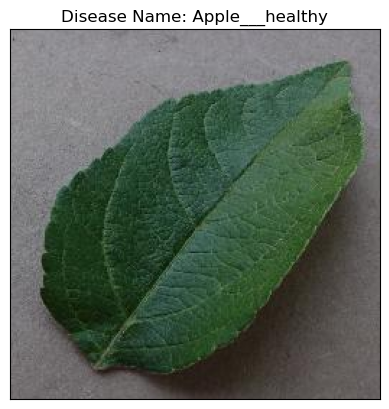

In [12]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()